In [2]:
#Load packages needed
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import random
import seaborn as sns 
import pandas as pd
import time
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:

dataframe =  pd.read_csv('magic04.data', sep=",",names=["Length","Widht","Size","Conc","Conc1","Asym","M3Long",
                                                        "m3Trans","Alpha","Dist","class"])

X = dataframe[["Length","Widht","Size","Conc","Asym","M3Long",
                                                        "m3Trans","Alpha","Dist"]]
y = dataframe["class"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
#sns.pairplot(data=dataframe,
#             palette="husl",
#             hue="class",
#             vars=["Length","Widht","Size","Conc","Conc1","Asym","M3Long",
#                                                        "m3Trans","Alpha","Dist"])
#plt.suptitle("PairPlot of Data Without Std. Dev. Fields",fontsize=18)
#plt.tight_layout()
#plt.show()   # pairplot without standard deviaton fields of data

In [10]:

print(y.shape)
print(dataframe.Length)

(19020,)
0         28.7967
1         31.6036
2        162.0520
3         23.8172
4         75.1362
           ...   
19015     21.3846
19016     28.9452
19017     75.4455
19018    120.5135
19019    187.1814
Name: Length, Length: 19020, dtype: float64


In [11]:
#Create the model
start_time = time.time()
svmmodel = svm.SVC(kernel = 'linear')
#Fit the model
svmmodel.fit(X_train,y_train)
print("--- %s seconds ---" % (time.time() - start_time))


--- 453.203161239624 seconds ---


In [32]:
#Create a prediction array from the test features
y_pred = svmmodel.predict(X_test)


In [33]:
print(accuracy_score(y_test,y_pred))

0.7877672625306694


In [4]:
#Load packages needed
import numpy as np
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [5]:
dataframe =  pd.read_csv('magic04.data', sep=",",names=["Length","Widht","Size","Conc","Conc1","Asym","M3Long",
                                                        "m3Trans","Alpha","Dist","class"])

X = dataframe[["Length","Widht","Size","Conc","Asym","M3Long",
                                                        "m3Trans","Alpha","Dist"]]
y = dataframe["class"]

#Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 4)


--- 0.6644673347473145 seconds ---

Average effect of the model 0.784915403692477

Accuracy of the model 0.7826848930949877
--- 0.8913102149963379 seconds ---

Average effect of the model 0.7918514742353265

Accuracy of the model 0.7900455660708027
--- 0.8323616981506348 seconds ---

Average effect of the model 0.8018387985670983

Accuracy of the model 0.8079214861549247
--- 0.903167724609375 seconds ---

Average effect of the model 0.8019457150730228

Accuracy of the model 0.806869961444094
--- 0.8888940811157227 seconds ---

Average effect of the model 0.8086296500413337

Accuracy of the model 0.81335436382755
--- 0.8725910186767578 seconds ---

Average effect of the model 0.8068864701019565

Accuracy of the model 0.8116018226428321
--- 1.023343801498413 seconds ---

Average effect of the model 0.8134568751722238

Accuracy of the model 0.8142306344199088
--- 0.9207427501678467 seconds ---

Average effect of the model 0.8089399283549187

Accuracy of the model 0.8123028391167192
--- 0.

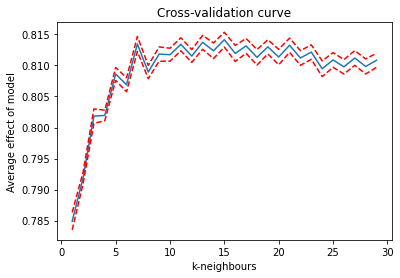

[0.784915403692477, 0.7918514742353265, 0.8018387985670983, 0.8019457150730228, 0.8086296500413337, 0.8068864701019565, 0.8134568751722238, 0.8089399283549187, 0.8118313585009643, 0.8117271975750896, 0.8134089280793606, 0.8115158445852851, 0.8137236153210252, 0.8123601543124827, 0.8141452190686139, 0.811938550564894, 0.8131479746486637, 0.8113072471755304, 0.8129917332598512, 0.811358500964453, 0.8132532378065582, 0.8112003306696058, 0.8121493524386882, 0.8094645907963626, 0.8108842656379167, 0.8097803802700468, 0.8112006062276109, 0.8098343896390189, 0.8108335629650041] [0.0007040084567225483, 0.00047348234162191663, 0.0005834880518762814, 0.0004249691072824232, 0.000516860164297569, 0.0005628105138932796, 0.000604259575109147, 0.0005358910277812434, 0.0005761948031840807, 0.0005225379367592482, 0.0005253974181224833, 0.000515951180370065, 0.0005588200537129296, 0.0006299391057812434, 0.0006007455488725929, 0.000646427573462329, 0.0005968930363401706, 0.0006245292369017502, 0.00057198

In [64]:
#Create the model
from sklearn.model_selection import cross_val_score as CVS

score = []
#Fit the model

cvs_mean=[]
cvs_var = []

lengd = range(1,30,1)
for i in lengd:
    start_time= time.time()
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    score.append(knn.score(X_test, y_test))
    print("--- %s seconds ---" % (time.time() - start_time))
    print("")
    y_pred = knn.predict(X_test)
    cvsresult = CVS(knn, X,y, cv = 100)
    cvs_mean.append(cvsresult.mean())
    cvs_var.append(cvsresult.var())
    print("Average effect of the model", cvsresult.mean())
    print("")
    print("Accuracy of the model", accuracy_score(y_pred,y_test))
plt.plot(lengd,cvs_mean)
plt.plot(lengd,np.array(cvs_mean)+np.array(cvs_var)*2,c='red',linestyle='--')
plt.plot(lengd,np.array(cvs_mean)-np.array(cvs_var)*2,c='red',linestyle='--')
plt.title("Cross-validation curve")
plt.xlabel("k-neighbours")
plt.ylabel("Average effect of model")
plt.show()

print(cvs_mean,cvs_var)

In [12]:
#Load packages needed
import numpy as np
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [94]:
#Load a toy model from sklearn
dataframe =  pd.read_csv('magic04.data', sep=",",names=["Length","Widht","Size","Conc","Conc1","Asym","M3Long",
                                                        "m3Trans","Alpha","Dist","class"])

X = dataframe[["Length","Widht","Size","Conc","Asym","M3Long",
                                                        "m3Trans","Alpha","Dist"]]
y = dataframe["class"]

#Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 4)

In [84]:
#Create the model
start_time=time.time()
logReg = LogisticRegression(tol=0.00001)
#Fit the model
logReg.fit(X_train,y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.30089354515075684 seconds ---


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
y_pred = logReg.predict(X_test)

In [101]:
accuracy_score(y_pred,y_test)

0.7860147213459516

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

0.8141452190686139
(array([14], dtype=int64),)


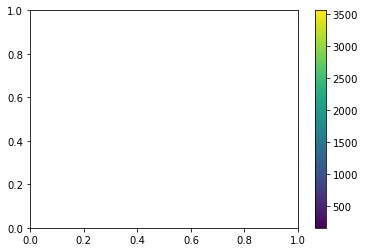

In [85]:



print(max(cvs_mean))
max_index = np.where(cvs_mean == np.amax(cvs_mean))
print(max_index)

#Computing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
ax.figure.colorbar(im, ax=ax)


dataframename = dataframe.columns.values
labells=list(dataframename)

 
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train,y_train)
score.append(knn.score(X_test, y_test))
y_pred = knn.predict(X_test)


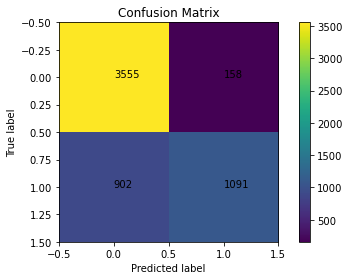

In [81]:
#The make the plot more descriptive
fig = plt.figure()
im = plt.imshow(cm)
plt.colorbar()


plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')


for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j]))
fig.tight_layout()